<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Slip-Stick-:-Modélisation-d'une-corde-de-violon" data-toc-modified-id="Slip-Stick-:-Modélisation-d'une-corde-de-violon-1">Slip-Stick : Modélisation d'une corde de violon</a></span><ul class="toc-item"><li><span><a href="#Modélisation" data-toc-modified-id="Modélisation-1.1">Modélisation</a></span></li><li><span><a href="#Résolution-numérique" data-toc-modified-id="Résolution-numérique-1.2">Résolution numérique</a></span><ul class="toc-item"><li><span><a href="#Conditions-initiales" data-toc-modified-id="Conditions-initiales-1.2.1">Conditions initiales</a></span></li><li><span><a href="#Détermination-de-l'état-du-système" data-toc-modified-id="Détermination-de-l'état-du-système-1.2.2">Détermination de l'état du système</a></span></li><li><span><a href="#Résolution-en-cas-d'adhérence" data-toc-modified-id="Résolution-en-cas-d'adhérence-1.2.3">Résolution en cas d'adhérence</a></span></li><li><span><a href="#Résolution-en-cas-de-glissement" data-toc-modified-id="Résolution-en-cas-de-glissement-1.2.4">Résolution en cas de glissement</a></span></li><li><span><a href="#Résolution-entière" data-toc-modified-id="Résolution-entière-1.2.5">Résolution entière</a></span></li><li><span><a href="#Analyse-des-résultats" data-toc-modified-id="Analyse-des-résultats-1.2.6">Analyse des résultats</a></span></li></ul></li><li><span><a href="#Bibliographie" data-toc-modified-id="Bibliographie-1.3">Bibliographie</a></span></li></ul></li></ul></div>

# Slip-Stick : Modélisation d'une corde de violon


Le mouvement d'une corde de violon déplacée par un archet fait apparaître une alternance de phase d'adhérence et de glissement ("stick-slip") :


<a href=https://simon-laurette.github.io/CN3_SlipStick/StickSlip.mp4><img src="https://simon-laurette.github.io/CN3_SlipStick/video.png" width="400" height="200"></a>

Nous allons étudier une situation expérimentale qui modélise cette situation :

<img src="https://simon-laurette.github.io/CN3_SlipStick/situation.png" width="400" height="200">


Le solide S1 est entraîné à une vitesse constante $\vec{v}_0$ par un moteur. Le solide S2 frotte sur S1 et est retenu à gauche par un dynamomètre qui est ici représenté par un ressort de raideur $k$ et de longueur à vide $l_0$.

On appelle $f_s$ le coefficient de frottement statique entre les deux solides, et $f_d$ le coefficient de frottement dynamique. La masse de S2 est notée $m$.

Ce mouvement de stick-slip peut aussi modéliser le crissement d'une craie sur un tableau (ou d'une chaise sur le sol). La hauteur du son émis est alors directement liée à la fréquence du phénomène de stick-slip.

*L'objectif de ce TP est de comprendre la situation étudiée et de prédire la fréquence du phénomène de stick-slip en fonction des différents paramètres de l'expérience.*




## Modélisation

**Question 1**
> Dans la modélisation, quel solide (S1 ou S2) joue le rôle de la corde ? de l'archet ? 
> Qui joue le rôle du ressort dans la situation réelle ?
> Quelle est la différence entre la situation réelle de la vidéo et la situation modélisée ?

> ***Corrigé***
>
> *S1 correspond à l'archet, S2 à la corde. C'est la force de rappel horizontale de la corde (due à ses attaches à ses extrémités, et à son élasticité "intrinsèque") qui est modélisée par le ressort. Dans la situation réelle, $\vec{v}_0$ est vers la gauche, alors qu'il est vers la droite dans notre modélisation.*

**Question 2**
> Représenter sur le schéma les différentes forces s'appliquant sur S2.

**Question 3**
> Lorsque S1 est en situation d'adhérence, que vaut $v= \frac{dx}{dt}$ ? A quelle condition sur $x$ sort-on de l'adhérence et rentre-t-on en glissement ?

> ***Corrigé***
>
> *En situation d'adhérence :
$$ \frac{dx}{dt}=v_0$$ car la vitesse de glissement entre S1 et S2 est nulle. On quitte l'adhérence lorsque la norme de la composante tangentielle de la réaction de S1 sur S2 vaut :
$$T=f_s N$$
Or, la seconde loi de Newton appliquée sur S1 dans le référentiel terrestre galiléen donne : 
$$N=mg$$
$$T=kx$$
D'où, on sort de l'adhérence quand 
$$x=\frac{f_s mg}{k}$$*

**Question 4**
> Lorsque S1 est en situation de glissement, quelle est l'équation différentielle vérifiée par $x$ ? A quelle condition sur $v=\frac{dx}{dt}$ (que l'on exprimera d'abord sous forme d'une égalité, puis d'une inégalité) va-t-on sortir du glissement ?

> ***Corrigé***
>
> *En situation de glissement :
>$$ T= f_d N$$ 
>L'application de la seconde loi de Newton donne désormais :
$$ m \frac{d^2 x }{dt^2 }=-kx + f_d mg $$
On quittera le glissement lors de l'annulation de la vitesse de glissement, soit quand :
$$v=v_0$$
Dans notre cas, lors du glissement, on a $v<v_0$, donc on pourra considérer qu'il y a adhérence dès que $v$ devient supérieure à $v_0$ : 
$$v>v_0$$ devient la condition de sortie du glissement (une inégalité étant plus pratique à implémenter qu'un test d'égalité entre réels).*



## Résolution numérique

On s'aperçoit ainsi que selon l'état (adhérence ou glissement) du système, l'équation à résoudre pour déterminer l'évolution de $x(t)$ diffère : comme ces états vont se succéder, il faudra à chaque fois résoudre les équations, en prenant en compte les continuités de $x$ et $\frac{dx}{dt}$ pour raccorder les solutions. Ce travail, s'il est possible, est toutefois laborieux... et la résolution numérique va nous permettre ici de visualiser rapidement le mouvement du solide $S1$.

### Conditions initiales

Dans un premier temps, on va exécuter le code ci-dessous, qui importe les modules Python nécessaires. Les valeurs numériques des différents paramètres du problème sont rentrées dans les unités du système international.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

v0=0.1 ## 0.01
fs=0.2
fd=0.1

k=20 #20 # il faudrait le déterminer au préalable

m=1  #1
g=9.81


t=[0] # t correspond à la liste des instants de calcul de la position x et de la vitesse xp (pour "xpoint")
tf=20 #100 instant final de l'étude
dt=0.001 #0.001 pas de calcul

**Question 5**
> Rappeler le compromis à faire sur le choix de $dt$ pour qu'il soit adapté à la résolution numérique.

> ***Corrigé***
>
> Le choix de $dt$ résulte dans le compromis entre précision de l'étude et temps de résolution. Il faut prendre en pratique $dt$ petit devant le temps caractéristique de la dynamique du système.


On a ensuite besoin d'une variable ```etat``` qui indiquera l'état dans lequel se situe S2 :
- l'état d'adhérence sera caractérisé par ```etat=0```
- l'état de glissement sera caractérisé par ```etat=1```

Par ailleurs, on va créer deux listes : ```l_x```et ```l_xp``` correspondant aux valeurs de $x$ et $\frac{dx}{dt}$ évalués aux instants indiqués dans la liste ```t```. On aura donc :
$$\mbox{l_x[i]}=x\left(t=t[i]\right)$$
$$\mbox{l_xp[i]}=\frac{dx}{dt}(t=t[i])$$

**Question 6**
> Compléter le code suivant pour définir l'état initial, correspondant au solide S1, placé sur le tapis, adhérent, en x=0.

In [ ]:
etat=###   

l_x=[0]
l_xp=####  

In [2]:
#corrigé 
etat=0
l_x=[0]
l_xp=[v0]

### Détermination de l'état du système

Le problème à résoudre est donc :

<img src="https://simon-laurette.github.io/CN3_SlipStick/algo2.png" width="500" height="250">

Ainsi, à chaque nouvelle estimation de $x$ et $\frac{dx}{dt}$, il faut vérifier si le système reste dans le même état ou s'il change d'état.

On définit alors la fonction ```state(x,xp,etat)``` qui retourne la valeur actualisée de ```etat``` à partir de la position ```x``` et de la vitesse ```xp```, nouvellement calculées, de S2.

**Question 7**
> Compléter le code suivant qui définit la fonction ```state```.

In [ ]:
def state(x,xp,etat):
        if etat==1 and xp>v0:
            return ####
        elif ####### and ##### :
            return 1
        else : #########

In [3]:
# corrigé 

def state(x,xp,etat):
        if etat==1 and xp>v0:
            return 0
        elif etat==0 and x>fs*m*g/k :
            return 1
        else : return etat

### Résolution en cas d'adhérence

Lorque S2 est en état d'adhérence, il faut résoudre :
$$\frac{dx}{dt}=v_0$$

**Question 8**
> Discrétiser cette équation pour donner la relation entre ```l_x[i+1]```, ```l_x[i]``` et les autres paramètres du problème, lors de l'état d'adhérence.

> ***Corrigé***
>
> *$$\mbox{l_x[i+1]}=\mbox{l_x[i]}+dt\times v_0$$*

### Résolution en cas de glissement

Lors du glissement de S2, il faut résoudre l'équation d'ordre 2 :

$$m \frac{d^2x}{dt^2}=- kx+f_d mg$$

Pour résoudre ce type d'équation avec la méthode d'Euler, on va se ramener à une équation différentielle d'ordre 1, en posant le vecteur :
$$Y= \begin{bmatrix} x \\ \dot{x}\end{bmatrix}$$

**Question 9**
> Montrer que $Y$ suit une équation différentielle d'ordre 1 de type :
> $$\dot{Y} = F(Y)$$ 
> où $ F : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ est une fonction dont on donnera l'expression $F(u,v)$ et dont l'on complètera la définition dans le code ci-dessous.

>***Corrigé***
>
>*$$\dot{Y}= \begin{bmatrix} \dot{x} \\ \ddot{x}\end{bmatrix}=\begin{bmatrix} \dot{x} \\ -\frac{k}{m} x + f_d g\end{bmatrix} =\begin{bmatrix} Y[1] \\ -\frac{k}{m}Y[0] + f_d g\end{bmatrix}=F(Y)$$*
>
>*avec :
>$$F : (u,v) \longmapsto \left(v,-\frac{k}{m}u+f_d g\right)$$*



In [ ]:
def F(u,v):
    return ###

In [4]:
#corrigé 
def F(u,v):
    return v,-k/m*u+fd*g

### Résolution entière

**Question 10**
> Compléter le code ci-dessous pour effectuer la résolution du problème et l'affichage de la position et la vitesse au cours du temps. A quoi correspondent les trais horizontaux présents dans les deux tracés ?

In [ ]:
l_etat=[etat]

while t[-1]<tf :    
    etat=state(l_x[-1],l_xp[-1],etat)
    l_etat.append(etat)
    if etat==0 :
        l_x.append(###)
        l_xp.append(###)
    else :
        a,b=F(l_x[-1],l_xp[-1])
        l_x.append(###)
        l_xp.append(###)
    
    t.append(###)
        
plt.close()
plt.figure()
plt.subplot(311)
plt.plot(t,l_x,t,[fs*m*g/k]*len(t))
plt.xlabel("Temps en secondes")
plt.ylabel("Position x en m")    
plt.grid()
plt.subplot(312)
plt.plot(t,l_xp,t,[v0]*len(t))
plt.xlabel("Temps en secondes")
plt.ylabel("Vitesse de S2 en m/s")
plt.grid()
plt.subplot(313)
plt.plot(t,l_etat)
plt.xlabel("Temps en secondes")
plt.ylabel("Etat de S2")

plt.grid()
plt.show()

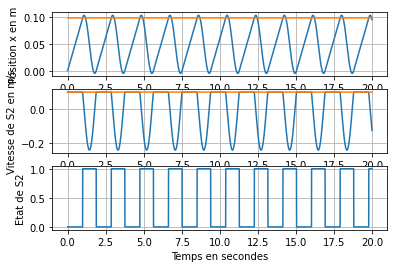

In [5]:
# corrigé
l_etat=[etat]

while t[-1]<tf :    
    etat=state(l_x[-1],l_xp[-1],etat)
    l_etat.append(etat)
    if etat==0 :
        l_x.append(l_x[-1]+dt*v0)
        l_xp.append(v0)
    else :
        a,b=F(l_x[-1],l_xp[-1])
        l_x.append(l_x[-1]+dt*a)
        l_xp.append(l_xp[-1]+dt*b)
    
    t.append(t[-1]+dt)


plt.close()
plt.figure()
plt.subplot(311)
plt.plot(t,l_x,t,[fs*m*g/k]*len(t))
plt.xlabel("Temps en secondes")
plt.ylabel("Position x en m")    
plt.grid()
plt.subplot(312)
plt.plot(t,l_xp,t,[v0]*len(t))
plt.xlabel("Temps en secondes")
plt.ylabel("Vitesse de S2 en m/s")
plt.grid()
plt.subplot(313)
plt.plot(t,l_etat)
plt.xlabel("Temps en secondes")
plt.ylabel("Etat de S2")

plt.grid()
plt.show()

### Analyse des résultats

A l'aide du code suivant, on peut déterminer le spectre du signal $x(t)$.

**Question 11**
> Exécuter le code et expliquer avec précision ce qu'il fait.


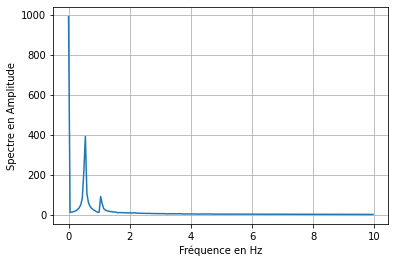

In [6]:
t_x=np.array(l_x)
n=t_x.size

spectre=np.fft.fft(t_x) # calcul du spectre
freq=np.fft.fftfreq(n,d=dt) # création de la liste des fréquences où est calculé le spectre.

plt.close()
plt.figure()
plt.plot(freq[0:int(len(freq)/100)],np.abs(spectre[0:int(len(freq)/100)]))
# on réduit la liste des fréquences pour la visualisation
plt.xlabel("Fréquence en Hz")
plt.ylabel("Spectre en Amplitude")
plt.grid()
plt.show()

In [7]:
max_spec=np.max(np.abs(spectre[1:int(len(freq)/100)]))
for i in range(1,int(len(freq)/100)):
    if np.abs(spectre)[i]==max_spec:
        imax=i
            
f=freq[imax]
print("La fréquence du slipstick est",str(f)[0:4],"Hz")

La fréquence du slipstick est 0.54 Hz


## Bibliographie

Pour approfondir la théorie derrière le stick-slip, ainsi que les méthodes de résolution "à la main", c'est-à-dire sans recours à la résolution numérique, on pourra consulter :

* *Exercice EE02 : Stick-Slip* - Feuille de TD M2
* *Cours 1 : crissement de la craie, mirages, cirage de bottes, phares et brouillard,...* - Claude Loverdo - http://www.lix.polytechnique.fr/Labo/Vincent.Pilaud/enseignement/cours_premiere/physique1.pdf

Au vu des simulations ici menées, j'émets toutefois un doute sur la validité des AN proposées dans ces références (notamment le "Cours 1..."), car elles ne semblent pas toujours compatibles avec l'hypothèse, quasi systématiquement faite dans les résolutions analytiques, que la phase de glissement est très courte devant la phase d'adhérence.
